# Connect Database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

In [ ]:
# Author - Kaveesha Baddage

# Install spaCy and neuralcoref with correct versions 

# !pip install -U spacy==2.1.0 

!python -m spacy download en

# !pip uninstall -y neuralcoref 

# !pip install neuralcoref --no-binary neuralcoref

!pip install pattern
!pip install clean-text
!pip install optuna

2023-06-05 17:57:15.976834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import keras
import numpy as np
import pandas as pd
import nltk
import os
import nltk.corpus
# import spacy
# import neuralcoref

In [ ]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load Data

In [ ]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_crime.txt', sep='|')
sanook

,title,content
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens..."
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76..."
...,...,...
952,"The old man is faint, 4 years old until the bl...",The police at Na Pho police station in Buriram...
953,The security guards followed the security guar...,"At 09.00 hrs. On 21 September, Pol.Col. Sathit..."
954,"6 wheels break!Crashed into the motorcycle, ex...",6 -wheel trucks In the middle of the intersect...
955,Broker hiring a 13 -year -old girl to work in ...,Broker hiring a 13 -year -old girl to work in ...


In [ ]:
thairath = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_crime_thairath_en.txt', sep='|')
thairath

,title,content
0,Maj. Gen. Wirachai Mercy shaved his head and m...,"Enter the parachute ""Maj. Gen. Wirachai Songme..."
1,"Rescuers find important evidence, axe-knife of...",The rescuer found the axe-knife of the middle....
2,"To issue the ""Police Sword Ching Thong"", order...","Chief Of Staff Sign the order for the ""Police ..."
3,Police sword Ching Thong confessed to the stre...,"Big Joke Pol. Gen. Surachet Hakpal, Deputy Chi..."
4,Drunkenness Stepson extinguished from mother-i...,"Dragging his neck to the smoke, a drunken youn..."
...,...,...
778,The police officer has been deceived by the ca...,The victim's representative cried. The police ...
779,No surprises. Prosecutor Star points to waterm...,Star Prosecutor points to the watermelon case....
780,"191 Attached to the rank of ""Police Dog"" to ""A...",Commander 191 was awarded the Police Dog Award...
781,"3 men selling marijuana, robbing tourists, cla...",3 young men selling marijuana on Khao San Road...


In [ ]:
df_raw_crime = pd.concat([sanook, thairath], join="inner", ignore_index=True)
df_raw_crime

,title,content
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens..."
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76..."
...,...,...
1735,The police officer has been deceived by the ca...,The victim's representative cried. The police ...
1736,No surprises. Prosecutor Star points to waterm...,Star Prosecutor points to the watermelon case....
1737,"191 Attached to the rank of ""Police Dog"" to ""A...",Commander 191 was awarded the Police Dog Award...
1738,"3 men selling marijuana, robbing tourists, cla...",3 young men selling marijuana on Khao San Road...


In [ ]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_sport.txt', sep='|')
sanook

,title,content
0,"Can play every day!Opening the warp ""Kim Mi-Ju...","Take to know Kim Mi-Ju, one of the famous Sout..."
1,"Big chest is the reason!""Minami Wiji"" from a f...","Regarded as another beautiful girl, raw fish t..."
2,Summary of the Premier League football match 2...,"The head of the Man City opened the house, won..."
3,"Clear angels ""Phen Pheng"", the most female mod...",Considered as another girl who likes to exerci...
4,"Come quickly!The most famous guru ""Ten Hak"" wa...",The famous Richard Key Guru revealed that the ...
...,...,...
921,"Not disappointed!Thailand smashed Taiwan 3-1, ...","October 7, 20:00 at 16:00 hrs. At Viet Tri Sta..."
922,Beyond resistance!Thai women volleyball defeat...,The 2022 World Women's Volleyball Championship...
923,The second half!Buriram United invaded Lamphun...,"Handrax Revo Thai League 2022/23, 8th Friday, ..."
924,"Eliminated but impressed!Foreign comments""Thai...",3 matches have passed for the Thai female rubb...


In [ ]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_sport_thaipbs_en.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,Intensely scored two days 4-under-par narrowly...,Today (15 Aug 2020) Reporter Report INTENSE LI...
1,"Thai League Co., Ltd. confirms the list of clu...","Thai League Co., Ltd. confirms the list of mem..."
2,Sisaket Take off the mitten to be a gardener ...,Reporter reports that Sisaket Nakhon Luang Pro...
3,"Thai Senior Swing Announces ""Toyota & Senior PGA""",Today (15 Aug 2020) Thai Senior Golf Associati...
4,Madame Pang is ready to support the Thai women...,Women's Professional Golf Association Movement...
...,...,...
563,Chaba Kaew beat Singapore 4-0 2023 SEA Games d...,Chaba Kaew beat Singapore 4-0 in the first rou...
564,Messi to move without renewing Paris Saint-Ger...,Lionel Messi will not renew his contract with ...
565,Supavadee - Kulsatri Yujitsu pair make their g...,"Thanks. Kaew Sa Saen - Kulsatri Khamsaroi, the..."
566,Tony Payne. fall over Broken ribs to miss mara...,Thai marathon runner Tony Payne may have to wi...


In [ ]:
df_raw_sport = pd.concat([sanook, thaipbs], join="inner", ignore_index=True)
df_raw_sport

,title,content
0,"Can play every day!Opening the warp ""Kim Mi-Ju...","Take to know Kim Mi-Ju, one of the famous Sout..."
1,"Big chest is the reason!""Minami Wiji"" from a f...","Regarded as another beautiful girl, raw fish t..."
2,Summary of the Premier League football match 2...,"The head of the Man City opened the house, won..."
3,"Clear angels ""Phen Pheng"", the most female mod...",Considered as another girl who likes to exerci...
4,"Come quickly!The most famous guru ""Ten Hak"" wa...",The famous Richard Key Guru revealed that the ...
...,...,...
1489,Chaba Kaew beat Singapore 4-0 2023 SEA Games d...,Chaba Kaew beat Singapore 4-0 in the first rou...
1490,Messi to move without renewing Paris Saint-Ger...,Lionel Messi will not renew his contract with ...
1491,Supavadee - Kulsatri Yujitsu pair make their g...,"Thanks. Kaew Sa Saen - Kulsatri Khamsaroi, the..."
1492,Tony Payne. fall over Broken ribs to miss mara...,Thai marathon runner Tony Payne may have to wi...


In [ ]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_politic_en.txt', sep='|')
sanook

,title,content
0,Thammasat warned ministers to be wary of falli...,"captain Thammasat Brahmaputra, Member of the H..."
1,Governor Chatchachart attended the ceremony to...,Chatchat-Pavena-Seetha attended the ceremony o...
2,Demonstration Minister Reiterate that there ar...,Mr. Sathit Patutecha Deputy Minister of Health...
3,The former MP is worried if Prayuth is out of ...,"Mr. Somchai Srisuttayakorn, Former Election Co..."
4,Doctor Ravi warns the government! The far-righ...,"Today (May 27), Dr. Ravi Maschamadol, a list M..."
...,...,...
703,U.N. representatives are concerned about the r...,"Glemont Wool, Special Reporter for the United ..."
704,"Lightning ""Inspector Shua"" left the civil serv...",Inspector Sue to leave the government service ...
705,"Bangkok reveals 8 electoral district formats, ...",Electoral Commission Bangkok Unveiled the form...
706,Pravit Dharmadhanas oversees the Northern Camp...,Gen. Pravit Wongsuwan The head of the Prachara...


In [ ]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_politics_thaipbs_en.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,Politics is bustling!,Many political parties have intensified their ...
1,"Nikorn Won, the government-opposition, did his...","Nikorn Won, the government-opposition to save ..."
2,Anucha Insist there is no lobby crash general ...,Anucha Confirming that there is no lobbying fo...
3,Chaithawat intercepts government MPs Don't pla...,Chaitawat Doug Government MPs don't play parli...
4,The NACC pointed out the cause of the offense....,NACC finds former deputy secretary of the SAT ...
...,...,...
855,"Election 2023: ""Prawit"" to campaign to help 3 ...",Gen. Prawit to campaign for final election Phu...
856,Election 2023 : Ram University is ready to hol...,SAT to check readiness Central polling locatio...
857,"Election 2023 : 7th Super Poll ""PT"" got 139 se...","The 7th Super Poll ""For Thai"" won 139 seats, ""..."
858,"Election 2556 : ""Settha"" reiterates ready to ...",Pae Thongtarn Video Call Stage for Thailand in...


In [ ]:
df_raw_politic = pd.concat([sanook, thaipbs], join="inner", ignore_index=True)
df_raw_politic

,title,content
0,Thammasat warned ministers to be wary of falli...,"captain Thammasat Brahmaputra, Member of the H..."
1,Governor Chatchachart attended the ceremony to...,Chatchat-Pavena-Seetha attended the ceremony o...
2,Demonstration Minister Reiterate that there ar...,Mr. Sathit Patutecha Deputy Minister of Health...
3,The former MP is worried if Prayuth is out of ...,"Mr. Somchai Srisuttayakorn, Former Election Co..."
4,Doctor Ravi warns the government! The far-righ...,"Today (May 27), Dr. Ravi Maschamadol, a list M..."
...,...,...
1563,"Election 2023: ""Prawit"" to campaign to help 3 ...",Gen. Prawit to campaign for final election Phu...
1564,Election 2023 : Ram University is ready to hol...,SAT to check readiness Central polling locatio...
1565,"Election 2023 : 7th Super Poll ""PT"" got 139 se...","The 7th Super Poll ""For Thai"" won 139 seats, ""..."
1566,"Election 2556 : ""Settha"" reiterates ready to ...",Pae Thongtarn Video Call Stage for Thailand in...


In [ ]:
thairath = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_tech_thairath_en.txt', sep='|')
thairath

,title,content
0,Apple confirms iCloud image scanning system on...,Apple is revealed in the FAQ or FAQ on Apple's...
1,Chinese authorities have filed a lawsuit again...,Chinese prosecutors indict Tencent Beijing pro...
2,Apple to launch child scanning system on iPhon...,Apple is preparing to launch a new feature to ...
3,Amazon users revealed that a salesperson sent ...,Amazon customers have revealed that they have ...
4,Huawei launches new digital power business to ...,Huawei confident in Thailand's digital potenti...
...,...,...
1195,Elon Musk had an attempt to take over OpenAI i...,"Elon Musk, one of the former co-founders of Op..."
1196,Twitter uses legal process Order the removal o...,"Twitter, a platform owned by Elon Musk, hopes ..."
1197,International media reports OPPO plans to with...,Oppo and OnePlus reportedly planned to end the...
1198,Microsoft launches Security Copilot using arti...,Microsoft continues to use artificial intellig...


In [ ]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_tech_thaipbs_en.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,Thai researchers discover mangosteen extract h...,Thai researchers discover mangosteen extract h...
1,5th Anniversary of Thai PBS Animation Contest ...,On the occasion of the 5th anniversary of Th...
2,"""No experience"" confirms ""NASA"" request to us...",Minister of Science and Technology Reaffirmin...
3,The Administrative Court scheduled an emergenc...,The Administrative Court scheduled an emergenc...
4,Suryasai prepares to submit to Administrative ...,Suryasai prepares to submit to Administrative ...
...,...,...
314,Online media warns against using social media ...,Online media warns against using social media ...
315,"""Thai Software"" advances through CMMI standar...","""Software Park"" pointed out that Thai softwar..."
316,MEA. Electricity consumption at the beginning ...,Metropolitan Electricity Authority reveals re...
317,Police arrest network of football betting site...,Police arrest network of football betting site...


In [ ]:
df_raw_tech = pd.concat([thairath, thaipbs], join="inner", ignore_index=True)
df_raw_tech

,title,content
0,Apple confirms iCloud image scanning system on...,Apple is revealed in the FAQ or FAQ on Apple's...
1,Chinese authorities have filed a lawsuit again...,Chinese prosecutors indict Tencent Beijing pro...
2,Apple to launch child scanning system on iPhon...,Apple is preparing to launch a new feature to ...
3,Amazon users revealed that a salesperson sent ...,Amazon customers have revealed that they have ...
4,Huawei launches new digital power business to ...,Huawei confident in Thailand's digital potenti...
...,...,...
1514,Online media warns against using social media ...,Online media warns against using social media ...
1515,"""Thai Software"" advances through CMMI standar...","""Software Park"" pointed out that Thai softwar..."
1516,MEA. Electricity consumption at the beginning ...,Metropolitan Electricity Authority reveals re...
1517,Police arrest network of football betting site...,Police arrest network of football betting site...


In [ ]:
thairath = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_business_thairath_en.txt', sep='|')
thairath

,title,content
0,"Isan BCG Expo 2022, a sustainable innovation e...","Isan BCG Expo 2022, the first sustainable inno..."
1,SEC and Digital Asset Governance Direction,"From the collapse of LUNA and TerraUSD (UST), ..."
2,"Gold price today, 10 December 2022, opened the...","Today's Gold Price On Saturday morning, Decemb..."
3,"Cinema and popcorn go hand in hand, but this y...",There's nothing as serious as COVID. Vicha Poo...
4,"Products nationwide are priced down, pigs and ...","Capt. Chakra Yodmanee Deputy Director-General,..."
...,...,...
1195,Trowel Deliver polls MPs to 9 political parties,Mr. Kriangkrai Thieranukul Chairman of the Fed...
1196,TAT joins hands with Tinder to invite singles ...,"Ms. Thapanee Kiatpaiboon, Deputy Governor for ..."
1197,Bangchak joins songkran oil price freeze,Mr. Somchai Tejavanich Chief Marketing Officer...
1198,Gold Price Gold Price Today 29 Mar 2023 Open W...,Gold Price Today Latest Open Wednesday morning...


In [ ]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_economic_thaipbs_en.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,"Unfold the timeline of the ""Red Line Extension...","Saksiam unveils timeline of ""Red Line Extensio..."
1,Thailand Pass will not be cancelled and new cr...,Assistant Spokesperson Insist on not canceling...
2,"The State Railway commissioned ""Ultraman"", a d...","The State Railway commissioned ""Ultraman"", Tha..."
3,Preparing for the opening of the country on May 1,Ministry of Transport prepares Suvarnabhumi Ai...
4,"Palm oil price jumps, shoe sucks selling 1 lit...",Palm planters Confirms retail price of palm oi...
...,...,...
200,"Accelerate the M81 motorway ""Bangyai-Kan"" to f...",Department of Highways reveals progress of M81...
201,Annuity 2 State Welfare Card Transfer in April...,The government announced the news of the 2nd a...
202,Transport cuts taxi driver's license points fo...,The Department of Transport tightens measures ...
203,Send it again Prime Minister asks the SAT to a...,"After the April 25 cabinet meeting, approved a..."


In [ ]:
df_raw_business = pd.concat([thairath, thaipbs], join="inner", ignore_index=True)
df_raw_business

,title,content
0,"Isan BCG Expo 2022, a sustainable innovation e...","Isan BCG Expo 2022, the first sustainable inno..."
1,SEC and Digital Asset Governance Direction,"From the collapse of LUNA and TerraUSD (UST), ..."
2,"Gold price today, 10 December 2022, opened the...","Today's Gold Price On Saturday morning, Decemb..."
3,"Cinema and popcorn go hand in hand, but this y...",There's nothing as serious as COVID. Vicha Poo...
4,"Products nationwide are priced down, pigs and ...","Capt. Chakra Yodmanee Deputy Director-General,..."
...,...,...
1400,"Accelerate the M81 motorway ""Bangyai-Kan"" to f...",Department of Highways reveals progress of M81...
1401,Annuity 2 State Welfare Card Transfer in April...,The government announced the news of the 2nd a...
1402,Transport cuts taxi driver's license points fo...,The Department of Transport tightens measures ...
1403,Send it again Prime Minister asks the SAT to a...,"After the April 25 cabinet meeting, approved a..."


In [ ]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_entertain_en.txt', sep='|')
sanook

,title,content
0,"GDH ""You and Me and Me"" will be released on Fe...",'GDH' Debut of the first romantic film of the ...
1,"Nugger gets hoops ""Good Thachai"" gets hit by t...",From the sweetest jin couple That many people ...
2,Ong Gewlin He revealed that he stopped working...,If you're going to mention the name of a famou...
3,Cherprang-Pupe-Namsai-before-6 years BNK48 fro...,Traveling as an artist for more than 6 years f...
4,Gina The Face reveals slimming formula after s...,"It's called standing one pretty puppet story, ..."
...,...,...
1186,Hai-Sen reveals that if he chooses to accept a...,"After 2 young Hai-Sen Paper Planes, the owner ..."
1187,Nonni Natcha sends music Like before advantage...,"The trend is too hot, overtaking all the trend..."
1188,Dongdong Kritsakorn Answered after being watch...,It is another couple who are being watched for...
1189,Open the latest photo Opal Panisara beautiful ...,"For Opal Panisara, the beautiful wife of Dr. O..."


In [ ]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_entertainment_thaipbs_en.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,Australian Capital Graffiti artists are allowe...,Canberra Australia's capital changes strategy ...
1,"The meaning of the ""rose"" and the connection o...",The best-selling flowers during Valentine's Da...
2,"Ratchaburi printmaker dreaded, no successor to...","For more than 50 years, the only typewriter of..."
3,"The ""Kids Play Games"" Way to the ""E-Sports Ath...",Changing attitudes for parents and Thai societ...
4,A new generation of architects design the use ...,"If you don't try it, you won't know how the em..."
...,...,...
318,Iran is the world's largest cosmetic surgery c...,Iran ranks No. 1 among the top 10 countries wo...
319,Nat-Aniporn Miss Universe Thailand 2015 and th...,"More than beauty, the influence of fashion has..."
320,"Sentai, a new trend of Japanese teachers-stude...","Teachers, students Students in Japan love fash..."
321,"Answer: The phenomenon of baby god dolls, righ...",The program responds to the question on 26 Jan...


In [ ]:
df_raw_ent = pd.concat([sanook, thaipbs], join="inner", ignore_index=True)
df_raw_ent

,title,content
0,"GDH ""You and Me and Me"" will be released on Fe...",'GDH' Debut of the first romantic film of the ...
1,"Nugger gets hoops ""Good Thachai"" gets hit by t...",From the sweetest jin couple That many people ...
2,Ong Gewlin He revealed that he stopped working...,If you're going to mention the name of a famou...
3,Cherprang-Pupe-Namsai-before-6 years BNK48 fro...,Traveling as an artist for more than 6 years f...
4,Gina The Face reveals slimming formula after s...,"It's called standing one pretty puppet story, ..."
...,...,...
1509,Iran is the world's largest cosmetic surgery c...,Iran ranks No. 1 among the top 10 countries wo...
1510,Nat-Aniporn Miss Universe Thailand 2015 and th...,"More than beauty, the influence of fashion has..."
1511,"Sentai, a new trend of Japanese teachers-stude...","Teachers, students Students in Japan love fash..."
1512,"Answer: The phenomenon of baby god dolls, righ...",The program responds to the question on 26 Jan...


In [ ]:
bbc = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/BBCNewsTrain.csv')
bbc

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [ ]:
bbc.rename(columns = {'Text' : 'content', 'Category' : 'tag'}, inplace = True)
bbc.dropna().reset_index(drop=True)
bbc

,ArticleId,content,tag
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [ ]:
df_raw_sport['tag'] = "sport"
df_raw_sport.head()

,title,content,tag
0,"Can play every day!Opening the warp ""Kim Mi-Ju...","Take to know Kim Mi-Ju, one of the famous Sout...",sport
1,"Big chest is the reason!""Minami Wiji"" from a f...","Regarded as another beautiful girl, raw fish t...",sport
2,Summary of the Premier League football match 2...,"The head of the Man City opened the house, won...",sport
3,"Clear angels ""Phen Pheng"", the most female mod...",Considered as another girl who likes to exerci...,sport
4,"Come quickly!The most famous guru ""Ten Hak"" wa...",The famous Richard Key Guru revealed that the ...,sport


In [ ]:
df_raw_crime['tag'] = "crime"
df_raw_crime.head()

,title,content,tag
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...,crime
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens...",crime
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...,crime
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76...",crime


In [ ]:
df_raw_politic['tag'] = "politics"
df_raw_politic.head()

,title,content,tag
0,Thammasat warned ministers to be wary of falli...,"captain Thammasat Brahmaputra, Member of the H...",politics
1,Governor Chatchachart attended the ceremony to...,Chatchat-Pavena-Seetha attended the ceremony o...,politics
2,Demonstration Minister Reiterate that there ar...,Mr. Sathit Patutecha Deputy Minister of Health...,politics
3,The former MP is worried if Prayuth is out of ...,"Mr. Somchai Srisuttayakorn, Former Election Co...",politics
4,Doctor Ravi warns the government! The far-righ...,"Today (May 27), Dr. Ravi Maschamadol, a list M...",politics


In [ ]:
df_raw_business['tag'] = "business"
df_raw_business.head()

,title,content,tag
0,"Isan BCG Expo 2022, a sustainable innovation e...","Isan BCG Expo 2022, the first sustainable inno...",business
1,SEC and Digital Asset Governance Direction,"From the collapse of LUNA and TerraUSD (UST), ...",business
2,"Gold price today, 10 December 2022, opened the...","Today's Gold Price On Saturday morning, Decemb...",business
3,"Cinema and popcorn go hand in hand, but this y...",There's nothing as serious as COVID. Vicha Poo...,business
4,"Products nationwide are priced down, pigs and ...","Capt. Chakra Yodmanee Deputy Director-General,...",business


In [ ]:
df_raw_ent['tag'] = "entertainment"
df_raw_ent.head()

,title,content,tag
0,"GDH ""You and Me and Me"" will be released on Fe...",'GDH' Debut of the first romantic film of the ...,entertainment
1,"Nugger gets hoops ""Good Thachai"" gets hit by t...",From the sweetest jin couple That many people ...,entertainment
2,Ong Gewlin He revealed that he stopped working...,If you're going to mention the name of a famou...,entertainment
3,Cherprang-Pupe-Namsai-before-6 years BNK48 fro...,Traveling as an artist for more than 6 years f...,entertainment
4,Gina The Face reveals slimming formula after s...,"It's called standing one pretty puppet story, ...",entertainment


In [ ]:
df_raw_tech['tag'] = "tech"
df_raw_tech.head()

,title,content,tag
0,Apple confirms iCloud image scanning system on...,Apple is revealed in the FAQ or FAQ on Apple's...,tech
1,Chinese authorities have filed a lawsuit again...,Chinese prosecutors indict Tencent Beijing pro...,tech
2,Apple to launch child scanning system on iPhon...,Apple is preparing to launch a new feature to ...,tech
3,Amazon users revealed that a salesperson sent ...,Amazon customers have revealed that they have ...,tech
4,Huawei launches new digital power business to ...,Huawei confident in Thailand's digital potenti...,tech


In [ ]:
df_raw = pd.concat([df_raw_crime, df_raw_sport, df_raw_politic, df_raw_tech, df_raw_ent, df_raw_business], join="inner", ignore_index=True)

In [ ]:
df_raw

,title,content,tag
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...,crime
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens...",crime
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...,crime
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76...",crime
...,...,...,...
9235,"Accelerate the M81 motorway ""Bangyai-Kan"" to f...",Department of Highways reveals progress of M81...,business
9236,Annuity 2 State Welfare Card Transfer in April...,The government announced the news of the 2nd a...,business
9237,Transport cuts taxi driver's license points fo...,The Department of Transport tightens measures ...,business
9238,Send it again Prime Minister asks the SAT to a...,"After the April 25 cabinet meeting, approved a...",business


In [ ]:
df_raw = df_raw.dropna().reset_index(drop=True)
df_raw['content'] = df_raw['title'] + ' ' + df_raw['content']
df_raw.drop('title',axis=1,inplace=True)
df_raw

,content,tag
0,The young man drove the rich on the highway.Li...,crime
1,Grandma led the grandchildren to report more.T...,crime
2,8 -year -old girl raped by a neighborThe wife ...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",crime
4,"Certainly drunk, Closed Circuit, capturing a g...",crime
...,...,...
9163,"Accelerate the M81 motorway ""Bangyai-Kan"" to f...",business
9164,Annuity 2 State Welfare Card Transfer in April...,business
9165,Transport cuts taxi driver's license points fo...,business
9166,Send it again Prime Minister asks the SAT to a...,business


In [ ]:
df = pd.concat([bbc[['content', 'tag']],df_raw], join="inner", ignore_index=True)
df = df.dropna().reset_index(drop=True)
df

,content,tag
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
...,...,...
10653,"Accelerate the M81 motorway ""Bangyai-Kan"" to f...",business
10654,Annuity 2 State Welfare Card Transfer in April...,business
10655,Transport cuts taxi driver's license points fo...,business
10656,Send it again Prime Minister asks the SAT to a...,business


In [ ]:
df["tag"].value_counts()

politics         1819
sport            1819
entertainment    1773
tech             1771
crime            1740
business         1736
Name: tag, dtype: int64

In [ ]:
df_crime = df[df['tag'] == "crime"][:1500]
df_sport = df[df['tag'] == "sport"][:1500]
df_politics = df[df['tag'] == "politics"][:1500]
df_business = df[df['tag'] == "business"][:1500]
df_tech = df[df['tag'] == "tech"][:1500]
df_entertainment = df[df['tag'] == "entertainment"][:1500]

df = pd.concat([df_crime, df_sport, df_politics, df_business, df_tech, df_entertainment], join="inner", ignore_index=True)
df = df.dropna().reset_index(drop=True)
df

,content,tag
0,The young man drove the rich on the highway.Li...,crime
1,Grandma led the grandchildren to report more.T...,crime
2,8 -year -old girl raped by a neighborThe wife ...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",crime
4,"Certainly drunk, Closed Circuit, capturing a g...",crime
...,...,...
8995,Miss Teen USA stage announces no swimsuits. Ch...,entertainment
8996,Hip hairstyles Salon Street 100 Baht! Because ...,entertainment
8997,South Korean research center hires beloved pet...,entertainment
8998,"How to view news pages and websites, which one...",entertainment


In [ ]:
df["tag"].value_counts()

crime            1500
sport            1500
politics         1500
business         1500
tech             1500
entertainment    1500
Name: tag, dtype: int64

# Text Preprocessing

## Clean Data

In [ ]:
import re
from cleantext import clean

def clean_data(text):
  text = text.lower()
  text = clean(text, no_emoji = True, no_line_breaks = True)
  text = re.sub('[^\w\s]+', '', text)
  text = re.sub('\d+', ' ', text)
  text = re.sub('\s+', ' ', text)
  return text.strip()

## Normalization (Lemmatization)

In [ ]:
import pattern
from pattern.en import lemma, lexeme

In [ ]:
def lemmatize_word(list_word):
  return [lemma(w) for w in list_word]

## Stop word removal

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
def remove_stopword(tokens):
  token = [w for w in tokens if not w in stop_words]
  return token

## Final Preprocessing

In [ ]:
def preprocessing(text):
  # clean data
  text = clean_data(text)
  # tokenize 
  token = nltk.word_tokenize(text)
  # remove stop words from tokens
  stop_token = remove_stopword(token)
  # lemmatise tokens
  lemma_word = lemmatize_word(stop_token)
  text = ' '.join(word for word in lemma_word)
  return text

In [ ]:
df['clean'] = df['content'].apply(preprocessing)
df.head()

,content,tag,clean
0,The young man drove the rich on the highway.Li...,crime,young man drive rich highwaylift police statio...
1,Grandma led the grandchildren to report more.T...,crime,grandma lead grandchildren report morethe monk...
2,8 -year -old girl raped by a neighborThe wife ...,crime,year old girl rape neighborthe wife slanderthe...
3,"Stepfather-real mother, attacking his 6-year-o...",crime,stepfatherreal mother attack yearold son break...
4,"Certainly drunk, Closed Circuit, capturing a g...",crime,certainly drink close circuit capture ghost ta...


In [ ]:
df['tag_id'] = df['tag'].factorize()[0]
#View first 10 entries of category_id, as a sanity check
df['tag_id'][0:10]
df.tail(20)

,content,tag,clean,tag_id
8980,Transgender girl advertising model helps sari ...,entertainment,transgender girl advertise model help sari ind...,5
8981,"Eight Stripes, the city of the river of life ...",entertainment,eight stripe city river life catchphrase chach...,5
8982,Bangkok Handmade Transport deciphers transport...,entertainment,bangkok handmade transport decipher transporta...,5
8983,School for Designers to Pursue a Career Path ...,entertainment,school designer pursue career path another dre...,5
8984,Om Cocktail as a plastic model collector Om C...,entertainment,om cocktail plastic model collector om cocktai...,5
8985,Beautiful but risky with 4 fashion threats to ...,entertainment,beautiful risky fashion threat health high hee...,5
8986,"Rare Thai dessert ""Rice poop"" of Dee Ban Pong,...",entertainment,rare thai dessert rice poop dee ban pong ratch...,5
8987,"Halbrad, the new invention of bicycle lovers I...",entertainment,halbrad new invention bicycle lover inventor g...,5
8988,"Know ""valiant"" Dhammanita"" from a canal boy to...",entertainment,know valiant dhammanita canal boy spokesperson...,5
8989,The heart is music. Age is not an obstacle of ...,entertainment,heart music age obstacle malinda herman malind...,5


In [ ]:
tag_id_df = df[['tag', 'tag_id']].drop_duplicates().sort_values('tag_id')
tag_id_df

,tag,tag_id
0,crime,0
1500,sport,1
3000,politics,2
4500,business,3
6000,tech,4
7500,entertainment,5


In [ ]:
tag_to_id = dict(tag_id_df.values)
id_to_tag = dict(tag_id_df[['tag_id', 'tag']].values)
id_to_tag

{0: 'crime',
 1: 'sport',
 2: 'politics',
 3: 'business',
 4: 'tech',
 5: 'entertainment'}

In [ ]:
tag_to_id

{'crime': 0,
 'sport': 1,
 'politics': 2,
 'business': 3,
 'tech': 4,
 'entertainment': 5}

In [ ]:
list(df['tag'].sort_values().unique())

['business', 'crime', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
df["token"] = df["clean"].apply(lambda x: x.split(' '))
df.head()

,content,tag,clean,tag_id,token
0,The young man drove the rich on the highway.Li...,crime,young man drive rich highwaylift police statio...,0,"[young, man, drive, rich, highwaylift, police,..."
1,Grandma led the grandchildren to report more.T...,crime,grandma lead grandchildren report morethe monk...,0,"[grandma, lead, grandchildren, report, morethe..."
2,8 -year -old girl raped by a neighborThe wife ...,crime,year old girl rape neighborthe wife slanderthe...,0,"[year, old, girl, rape, neighborthe, wife, sla..."
3,"Stepfather-real mother, attacking his 6-year-o...",crime,stepfatherreal mother attack yearold son break...,0,"[stepfatherreal, mother, attack, yearold, son,..."
4,"Certainly drunk, Closed Circuit, capturing a g...",crime,certainly drink close circuit capture ghost ta...,0,"[certainly, drink, close, circuit, capture, gh..."


In [ ]:
all_token = tokens = df['token'].explode().values
all_token

array(['young', 'man', 'drive', ..., 'time', 'blue', 'light'],
      dtype=object)

In [ ]:
unique_word = len(set(all_token))
unique_word

56011

# TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf  = TfidfVectorizer(
  stop_words = 'english',                      # ป้อนรายการคำ Stop words 
  ngram_range = (1,2),                         # อยากวิเคราะห์แบบ 2 คำ ติดกัน
  min_df = 5,                                  # ขั้นต่ำของ Doc Freq ของ Term
  max_df = 0.95,
  max_features = 300,
  norm='l2'
)

# Prepare Train & Test Dataset (TF-IDF)

In [ ]:
N = len(id_to_tag)

In [ ]:
tag_seq = pd.get_dummies(df['tag']).values
print('Shape of label tensor:', tag_seq.shape)

Shape of label tensor: (9000, 6)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pad_seq, tag_seq, test_size = 0.20, random_state = 101)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7200, 300) (7200, 6)
(1800, 300) (1800, 6)


In [ ]:
tfidvec_train = tfidf.fit_transform(X_train)
tfidvec_test = tfidf.transform(X_test)

In [ ]:
X_train = tfidvec_train.toarray()
X_test = tfidvec_test.toarray()
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7200, 300) (7200, 6)
(1800, 300) (1800, 6)


# LSTM TF-IDF

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Bidirectional
from keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf
import optuna

epochs = 20
batch_size = 64

def objective(trial):
    # Define the hyperparameters to optimize
    lstm_units = trial.suggest_int("lstm_units", 64, 128)
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.2)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)

    # Build the LSTM model with the hyperparameters
    model = Sequential()
    model.add(Embedding(20000, 300, input_length=X_train.shape[1]))
    model.add(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(6, activation='softmax'))

    # Compile the model with the hyperparameters
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with the hyperparameters
    history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=3,
                                             min_delta=0.0001)])

    # Evaluate the model and return the validation accuracy as the objective value
    _, val_acc = model.evaluate(X_test, y_test, verbose=0)
    return val_acc

# Define the Optuna study and optimize the hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Print the results
print("Best hyperparameters: {}".format(study.best_params))
print("Best validation accuracy: {:.3f}".format(study.best_value))

[I 2023-06-05 10:17:13,649] A new study created in memory with name: no-name-5833b3f6-4845-4aa7-92f6-93f3de0bee54
<ipython-input-63-a51f16b07f0e>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.2)
<ipython-input-63-a51f16b07f0e>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)


Epoch 1/20
102/102 [==============================] - 232s 2s/step - loss: 1.7963 - accuracy: 0.1660 - val_loss: 1.7985 - val_accuracy: 0.1583
Epoch 2/20
102/102 [==============================] - 218s 2s/step - loss: 1.7928 - accuracy: 0.1741 - val_loss: 1.7918 - val_accuracy: 0.1639
Epoch 3/20
102/102 [==============================] - 215s 2s/step - loss: 1.7926 - accuracy: 0.1722 - val_loss: 1.7908 - val_accuracy: 0.1917
Epoch 4/20
102/102 [==============================] - 217s 2s/step - loss: 1.7931 - accuracy: 0.1691 - val_loss: 1.7943 - val_accuracy: 0.1583
Epoch 5/20
102/102 [==============================] - 218s 2s/step - loss: 1.7927 - accuracy: 0.1613 - val_loss: 1.7938 - val_accuracy: 0.1583
Epoch 6/20
102/102 [==============================] - 218s 2s/step - loss: 1.7925 - accuracy: 0.1718 - val_loss: 1.7929 - val_accuracy: 0.1583


[I 2023-06-05 10:39:56,239] Trial 0 finished with value: 0.15555556118488312 and parameters: {'lstm_units': 96, 'dropout_rate': 0.1262056818169048, 'learning_rate': 0.0032232841944512614}. Best is trial 0 with value: 0.15555556118488312.


Epoch 1/20
102/102 [==============================] - 254s 2s/step - loss: 1.7922 - accuracy: 0.1644 - val_loss: 1.7930 - val_accuracy: 0.1583
Epoch 2/20
102/102 [==============================] - 250s 2s/step - loss: 1.7919 - accuracy: 0.1668 - val_loss: 1.7931 - val_accuracy: 0.1583
Epoch 3/20
102/102 [==============================] - 249s 2s/step - loss: 1.7919 - accuracy: 0.1623 - val_loss: 1.7928 - val_accuracy: 0.1639
Epoch 4/20
102/102 [==============================] - 253s 2s/step - loss: 1.7920 - accuracy: 0.1691 - val_loss: 1.7927 - val_accuracy: 0.1583
Epoch 5/20
102/102 [==============================] - 251s 2s/step - loss: 1.7918 - accuracy: 0.1588 - val_loss: 1.7928 - val_accuracy: 0.1583
Epoch 6/20
102/102 [==============================] - 251s 2s/step - loss: 1.7919 - accuracy: 0.1648 - val_loss: 1.7932 - val_accuracy: 0.1583


[I 2023-06-05 11:05:32,135] Trial 1 finished with value: 0.15555556118488312 and parameters: {'lstm_units': 99, 'dropout_rate': 0.1667044348968436, 'learning_rate': 3.0065313299452148e-05}. Best is trial 0 with value: 0.15555556118488312.


Epoch 1/20
102/102 [==============================] - 218s 2s/step - loss: 1.7957 - accuracy: 0.1623 - val_loss: 1.7945 - val_accuracy: 0.1486
Epoch 2/20
102/102 [==============================] - 216s 2s/step - loss: 1.7931 - accuracy: 0.1619 - val_loss: 1.7936 - val_accuracy: 0.1583
Epoch 3/20
102/102 [==============================] - 219s 2s/step - loss: 1.7924 - accuracy: 0.1631 - val_loss: 1.7953 - val_accuracy: 0.1583
Epoch 4/20
 15/102 [===>..........................] - ETA: 3:04 - loss: 1.7925 - accuracy: 0.1708

[W 2023-06-05 11:16:58,836] Trial 2 failed with parameters: {'lstm_units': 96, 'dropout_rate': 0.11845127544415936, 'learning_rate': 0.002161851264410617} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-63-a51f16b07f0e>", line 28, in objective
    history = model.fit(X_train, y_train,
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1685, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_functio

KeyboardInterrupt: ignored

In [ ]:
best_params = study.best_params

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Bidirectional
from keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf
import optuna

epochs = 50
batch_size = 64

# Build the LSTM model with the hyperparameters
model = Sequential()
model.add(Embedding(20000, 300, input_length=X_train.shape[1]))
model.add(LSTM(108, dropout=0.174, recurrent_dropout=0.174))
model.add(Dense(N, activation='softmax'))

# Compile the model with the hyperparameters
optimizer = tf.keras.optimizers.Adam(0.00040)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the hyperparameters
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=3,
                                             min_delta=0.0001)])

  

Epoch 1/50
102/102 [==============================] - 235s 2s/step - loss: 1.7941 - accuracy: 0.1600 - val_loss: 1.7950 - val_accuracy: 0.1486
Epoch 2/50
102/102 [==============================] - 235s 2s/step - loss: 1.7939 - accuracy: 0.1614 - val_loss: 1.7914 - val_accuracy: 0.1653
Epoch 3/50
102/102 [==============================] - 230s 2s/step - loss: 1.7929 - accuracy: 0.1557 - val_loss: 1.7934 - val_accuracy: 0.1583
Epoch 4/50
102/102 [==============================] - 229s 2s/step - loss: 1.7930 - accuracy: 0.1529 - val_loss: 1.7931 - val_accuracy: 0.1736
Epoch 5/50
102/102 [==============================] - 243s 2s/step - loss: 1.7923 - accuracy: 0.1640 - val_loss: 1.7931 - val_accuracy: 0.1486


In [ ]:
accr = model.evaluate(X_test,y_test)
print('Test set\n\tLoss: {:0.3f}\n\tAccuracy: {:0.3f}'\
      .format(accr[0],accr[1]))

57/57 [==============================] - 11s 190ms/step - loss: 1.7928 - accuracy: 0.1694
Test set
	Loss: 1.793
	Accuracy: 0.169


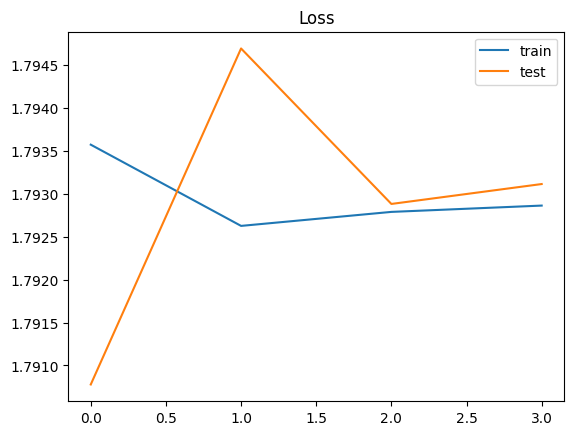

In [ ]:
import matplotlib.pyplot as plt
# Loss function
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

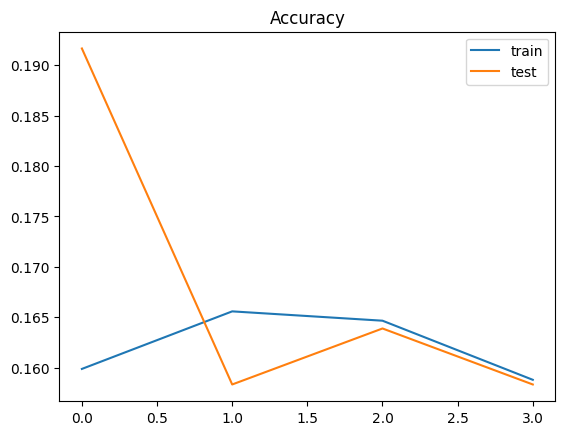

In [ ]:
# Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), 
                              y_pred.argmax(axis=1)))

57/57 [==============================] - 13s 211ms/step


,0,1,2,3,4,5
0,0,0,0,0,0,280
1,0,0,0,0,0,310
2,0,0,0,0,0,314
3,0,0,0,0,0,282
4,0,0,0,0,0,309
5,0,0,0,0,0,305


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(y_true=y_test.argmax(axis=1), 
                            y_pred=y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       280
           1       0.00      0.00      0.00       310
           2       0.00      0.00      0.00       314
           3       0.00      0.00      0.00       282
           4       0.00      0.00      0.00       309
           5       0.17      1.00      0.29       305

    accuracy                           0.17      1800
   macro avg       0.03      0.17      0.05      1800
weighted avg       0.03      0.17      0.05      1800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Prepare Train & Test Dataset (Token & Pad Sequence)

In [ ]:
N = len(id_to_tag)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(df['clean'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 55980 unique tokens.


In [ ]:
import pickle

pickle.dump(tokenizer, open('/content/drive/MyDrive/AI_Tagging/model/tokenizer_eng_new.pkl', 'wb'))


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
seq = tokenizer.texts_to_sequences(df['clean'])
pad_seq = pad_sequences(seq, maxlen=300)
print('Shape of data tensor:', pad_seq.shape)

Shape of data tensor: (9000, 300)


In [ ]:
tag_seq = pd.get_dummies(df['tag']).values
print('Shape of label tensor:', tag_seq.shape)

Shape of label tensor: (9000, 6)


In [ ]:
pd.get_dummies(df['tag'])

,business,crime,entertainment,politics,sport,tech
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
8995,0,0,1,0,0,0
8996,0,0,1,0,0,0
8997,0,0,1,0,0,0
8998,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pad_seq, tag_seq, test_size = 0.20, random_state = 101)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7200, 300) (7200, 6)
(1800, 300) (1800, 6)


# LSTM Tune

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Bidirectional
from keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf
import optuna

epochs = 50
batch_size = 64

def objective(trial):
    # Define the hyperparameters to optimize
    lstm_units = trial.suggest_int("lstm_units", 64, 128)
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.2)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)

    # Build the LSTM model with the hyperparameters
    model = Sequential()
    model.add(Embedding(20000, 300, input_length=pad_seq.shape[1]))
    model.add(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(N, activation='softmax'))

    # Compile the model with the hyperparameters
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with the hyperparameters
    history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=3,
                                             min_delta=0.0001)])

    # Evaluate the model and return the validation accuracy as the objective value
    _, val_acc = model.evaluate(X_test, y_test, verbose=0)
    return val_acc

# Define the Optuna study and optimize the hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Print the results
print("Best hyperparameters: {}".format(study.best_params))
print("Best validation accuracy: {:.3f}".format(study.best_value))

[I 2023-05-11 11:31:16,365] A new study created in memory with name: no-name-ede1dc25-5987-41da-919d-707da7fc7237
<ipython-input-57-1118a432081d>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.2)
<ipython-input-57-1118a432081d>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)


Epoch 1/50
102/102 [==============================] - 163s 2s/step - loss: 1.3690 - accuracy: 0.4429 - val_loss: 0.9199 - val_accuracy: 0.5417
Epoch 2/50
102/102 [==============================] - 152s 1s/step - loss: 0.8128 - accuracy: 0.7387 - val_loss: 0.6795 - val_accuracy: 0.7903
Epoch 3/50
102/102 [==============================] - 144s 1s/step - loss: 0.3934 - accuracy: 0.9080 - val_loss: 0.4777 - val_accuracy: 0.8625
Epoch 4/50
102/102 [==============================] - 145s 1s/step - loss: 0.2178 - accuracy: 0.9460 - val_loss: 0.4753 - val_accuracy: 0.8431
Epoch 5/50
102/102 [==============================] - 143s 1s/step - loss: 0.2196 - accuracy: 0.9410 - val_loss: 0.4848 - val_accuracy: 0.8736
Epoch 6/50
102/102 [==============================] - 139s 1s/step - loss: 0.1400 - accuracy: 0.9659 - val_loss: 0.3203 - val_accuracy: 0.9139
Epoch 7/50
102/102 [==============================] - 141s 1s/step - loss: 0.0970 - accuracy: 0.9778 - val_loss: 0.3227 - val_accuracy: 0.9153

[I 2023-05-11 11:57:47,528] Trial 0 finished with value: 0.948888897895813 and parameters: {'lstm_units': 108, 'dropout_rate': 0.17447267347817208, 'learning_rate': 0.0003978106253669335}. Best is trial 0 with value: 0.948888897895813.


Epoch 1/50
102/102 [==============================] - 154s 1s/step - loss: 1.7816 - accuracy: 0.3293 - val_loss: 1.7675 - val_accuracy: 0.5278
Epoch 2/50
102/102 [==============================] - 146s 1s/step - loss: 1.6375 - accuracy: 0.4840 - val_loss: 1.4340 - val_accuracy: 0.3722
Epoch 3/50
102/102 [==============================] - 146s 1s/step - loss: 1.3621 - accuracy: 0.3449 - val_loss: 1.2798 - val_accuracy: 0.3931
Epoch 4/50
102/102 [==============================] - 145s 1s/step - loss: 1.1752 - accuracy: 0.4966 - val_loss: 1.0715 - val_accuracy: 0.6639
Epoch 5/50
102/102 [==============================] - 143s 1s/step - loss: 0.8795 - accuracy: 0.7267 - val_loss: 0.7786 - val_accuracy: 0.7653
Epoch 6/50
102/102 [==============================] - 142s 1s/step - loss: 0.6538 - accuracy: 0.8219 - val_loss: 0.7245 - val_accuracy: 0.8292
Epoch 7/50
102/102 [==============================] - 139s 1s/step - loss: 0.5929 - accuracy: 0.8796 - val_loss: 0.6194 - val_accuracy: 0.8653

[I 2023-05-11 12:54:17,225] Trial 1 finished with value: 0.9138888716697693 and parameters: {'lstm_units': 78, 'dropout_rate': 0.1643719297022306, 'learning_rate': 6.885056881113314e-05}. Best is trial 0 with value: 0.948888897895813.


Epoch 1/50
102/102 [==============================] - 151s 1s/step - loss: 1.5519 - accuracy: 0.4372 - val_loss: 1.0833 - val_accuracy: 0.6681
Epoch 2/50
102/102 [==============================] - 144s 1s/step - loss: 0.7819 - accuracy: 0.7912 - val_loss: 0.6094 - val_accuracy: 0.8153
Epoch 3/50
102/102 [==============================] - 144s 1s/step - loss: 0.4126 - accuracy: 0.9102 - val_loss: 0.3791 - val_accuracy: 0.8958
Epoch 4/50
102/102 [==============================] - 144s 1s/step - loss: 0.4328 - accuracy: 0.8711 - val_loss: 0.3447 - val_accuracy: 0.9042
Epoch 5/50
102/102 [==============================] - 136s 1s/step - loss: 0.1601 - accuracy: 0.9657 - val_loss: 0.2953 - val_accuracy: 0.9056
Epoch 6/50
102/102 [==============================] - 138s 1s/step - loss: 0.1202 - accuracy: 0.9736 - val_loss: 0.2878 - val_accuracy: 0.9181
Epoch 7/50
102/102 [==============================] - 139s 1s/step - loss: 0.1061 - accuracy: 0.9773 - val_loss: 0.3297 - val_accuracy: 0.9097

[I 2023-05-11 13:15:48,582] Trial 2 finished with value: 0.9394444227218628 and parameters: {'lstm_units': 95, 'dropout_rate': 0.19497366256829454, 'learning_rate': 0.0002954261280249661}. Best is trial 0 with value: 0.948888897895813.


Epoch 1/50
102/102 [==============================] - 153s 1s/step - loss: 0.9833 - accuracy: 0.6571 - val_loss: 0.4297 - val_accuracy: 0.8792
Epoch 2/50
102/102 [==============================] - 146s 1s/step - loss: 0.4962 - accuracy: 0.8597 - val_loss: 0.4097 - val_accuracy: 0.8972
Epoch 3/50
102/102 [==============================] - 144s 1s/step - loss: 0.1638 - accuracy: 0.9566 - val_loss: 0.3527 - val_accuracy: 0.9097
Epoch 4/50
102/102 [==============================] - 143s 1s/step - loss: 0.1265 - accuracy: 0.9642 - val_loss: 0.3487 - val_accuracy: 0.9125
Epoch 5/50
102/102 [==============================] - 141s 1s/step - loss: 0.0411 - accuracy: 0.9894 - val_loss: 0.3424 - val_accuracy: 0.9236
Epoch 6/50
102/102 [==============================] - 140s 1s/step - loss: 0.0210 - accuracy: 0.9952 - val_loss: 0.3702 - val_accuracy: 0.9097
Epoch 7/50
102/102 [==============================] - 140s 1s/step - loss: 0.0169 - accuracy: 0.9957 - val_loss: 0.3723 - val_accuracy: 0.9181

[I 2023-05-11 13:35:00,719] Trial 3 finished with value: 0.9322222471237183 and parameters: {'lstm_units': 128, 'dropout_rate': 0.16693299079220464, 'learning_rate': 0.001499047347382438}. Best is trial 0 with value: 0.948888897895813.


Epoch 1/50
102/102 [==============================] - 153s 1s/step - loss: 0.8828 - accuracy: 0.7230 - val_loss: 0.4568 - val_accuracy: 0.8819
Epoch 2/50
102/102 [==============================] - 145s 1s/step - loss: 0.3006 - accuracy: 0.9113 - val_loss: 0.4464 - val_accuracy: 0.8833
Epoch 3/50
102/102 [==============================] - 146s 1s/step - loss: 0.1335 - accuracy: 0.9630 - val_loss: 0.3909 - val_accuracy: 0.9000
Epoch 4/50
102/102 [==============================] - 143s 1s/step - loss: 0.0696 - accuracy: 0.9827 - val_loss: 0.4516 - val_accuracy: 0.8944
Epoch 5/50
102/102 [==============================] - 141s 1s/step - loss: 0.0803 - accuracy: 0.9790 - val_loss: 0.5437 - val_accuracy: 0.8569
Epoch 6/50
102/102 [==============================] - 139s 1s/step - loss: 0.0348 - accuracy: 0.9909 - val_loss: 0.4714 - val_accuracy: 0.9069


[I 2023-05-11 13:50:30,221] Trial 4 finished with value: 0.8883333206176758 and parameters: {'lstm_units': 82, 'dropout_rate': 0.13528766294587152, 'learning_rate': 0.0028429420028150115}. Best is trial 0 with value: 0.948888897895813.


Epoch 1/50
102/102 [==============================] - 155s 1s/step - loss: 1.6992 - accuracy: 0.5094 - val_loss: 1.3138 - val_accuracy: 0.5250
Epoch 2/50
102/102 [==============================] - 149s 1s/step - loss: 1.1280 - accuracy: 0.6846 - val_loss: 0.9785 - val_accuracy: 0.7403
Epoch 3/50
102/102 [==============================] - 147s 1s/step - loss: 0.6887 - accuracy: 0.8341 - val_loss: 0.5850 - val_accuracy: 0.8861
Epoch 4/50
102/102 [==============================] - 142s 1s/step - loss: 0.4645 - accuracy: 0.9116 - val_loss: 0.4846 - val_accuracy: 0.8889
Epoch 5/50
102/102 [==============================] - 152s 1s/step - loss: 0.3850 - accuracy: 0.9085 - val_loss: 0.5920 - val_accuracy: 0.8194
Epoch 6/50
102/102 [==============================] - 181s 2s/step - loss: 0.3168 - accuracy: 0.9224 - val_loss: 0.3452 - val_accuracy: 0.9139
Epoch 7/50
102/102 [==============================] - 152s 1s/step - loss: 0.2040 - accuracy: 0.9602 - val_loss: 0.3047 - val_accuracy: 0.9264

[I 2023-05-11 14:26:54,222] Trial 5 finished with value: 0.9394444227218628 and parameters: {'lstm_units': 66, 'dropout_rate': 0.1612073645560671, 'learning_rate': 0.00020555774111855797}. Best is trial 0 with value: 0.948888897895813.


Epoch 1/50
102/102 [==============================] - 152s 1s/step - loss: 1.7901 - accuracy: 0.1860 - val_loss: 1.7875 - val_accuracy: 0.2597
Epoch 2/50
102/102 [==============================] - 144s 1s/step - loss: 1.7870 - accuracy: 0.2434 - val_loss: 1.7845 - val_accuracy: 0.3375
Epoch 3/50
102/102 [==============================] - 144s 1s/step - loss: 1.7832 - accuracy: 0.3171 - val_loss: 1.7815 - val_accuracy: 0.3847
Epoch 4/50
102/102 [==============================] - 142s 1s/step - loss: 1.7794 - accuracy: 0.3960 - val_loss: 1.7781 - val_accuracy: 0.4458
Epoch 5/50
102/102 [==============================] - 141s 1s/step - loss: 1.7753 - accuracy: 0.4432 - val_loss: 1.7742 - val_accuracy: 0.4833
Epoch 6/50
102/102 [==============================] - 142s 1s/step - loss: 1.7705 - accuracy: 0.4971 - val_loss: 1.7697 - val_accuracy: 0.5236
Epoch 7/50
102/102 [==============================] - 140s 1s/step - loss: 1.7646 - accuracy: 0.5534 - val_loss: 1.7643 - val_accuracy: 0.5639

In [ ]:
best_params = study.best_params

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Bidirectional
from keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf
import optuna

epochs = 50
batch_size = 64

# Build the LSTM model with the hyperparameters
model = Sequential()
model.add(Embedding(20000, 300, input_length=pad_seq.shape[1]))
model.add(LSTM(units=best_params['lstm_units'], dropout=best_params['dropout_rate'], recurrent_dropout=best_params['dropout_rate']))
model.add(Dense(N, activation='softmax'))

# Compile the model with the hyperparameters
optimizer = tf.keras.optimizers.Adam(best_params['learning_rate'])
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the hyperparameters
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=3,
                                             min_delta=0.0001)])

  

In [ ]:
{'lstm_units': 108, 'dropout_rate': 0.17447267347817208, 'learning_rate': 0.0003978106253669335}

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Bidirectional
from keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf
import optuna

epochs = 50
batch_size = 64

# Build the LSTM model with the hyperparameters
model = Sequential()
model.add(Embedding(20000, 300, input_length=pad_seq.shape[1]))
model.add(LSTM(units=108, dropout=0.17447267347817208, recurrent_dropout=0.17447267347817208))
model.add(Dense(N, activation='softmax'))

# Compile the model with the hyperparameters
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003978106253669335)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the hyperparameters
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=3,
                                             min_delta=0.0001)])

  

Epoch 1/50
102/102 [==============================] - 154s 1s/step - loss: 1.4006 - accuracy: 0.5852 - val_loss: 0.8497 - val_accuracy: 0.7750
Epoch 2/50
102/102 [==============================] - 149s 1s/step - loss: 0.5726 - accuracy: 0.8617 - val_loss: 0.4889 - val_accuracy: 0.8722
Epoch 3/50
102/102 [==============================] - 147s 1s/step - loss: 0.3406 - accuracy: 0.9179 - val_loss: 0.3155 - val_accuracy: 0.9167
Epoch 4/50
102/102 [==============================] - 147s 1s/step - loss: 0.1804 - accuracy: 0.9543 - val_loss: 0.5314 - val_accuracy: 0.8556
Epoch 5/50
102/102 [==============================] - 150s 1s/step - loss: 0.3497 - accuracy: 0.8975 - val_loss: 0.3412 - val_accuracy: 0.9028
Epoch 6/50
102/102 [==============================] - 147s 1s/step - loss: 0.1327 - accuracy: 0.9745 - val_loss: 0.2755 - val_accuracy: 0.9264
Epoch 7/50
102/102 [==============================] - 149s 1s/step - loss: 0.0664 - accuracy: 0.9875 - val_loss: 0.2675 - val_accuracy: 0.9306

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Bidirectional
from keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf
import optuna

epochs = 50
batch_size = 64

# Build the LSTM model with the hyperparameters
model = Sequential()
model.add(Embedding(50000, 300, input_length=pad_seq.shape[1]))
model.add(LSTM(units=65, dropout=0.16804771290837311, recurrent_dropout=0.16804771290837311))
model.add(Dense(N, activation='softmax'))

# Compile the model with the hyperparameters
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00029937978660324956)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the hyperparameters
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=3,
                                             min_delta=0.0001)])

  

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/AI_Tagging/model/model_lstm_eng_dowmsampling.h5')

In [ ]:
accr = model.evaluate(X_test,y_test)
print('Test set\n\tLoss: {:0.3f}\n\tAccuracy: {:0.3f}'\
      .format(accr[0],accr[1]))

57/57 [==============================] - 6s 111ms/step - loss: 0.2521 - accuracy: 0.9378
Test set
	Loss: 0.252
	Accuracy: 0.938


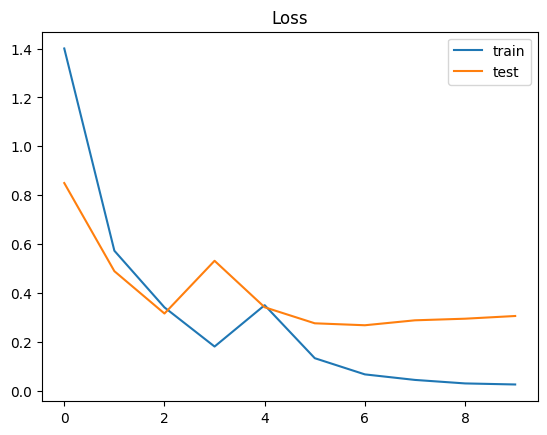

In [ ]:
import matplotlib.pyplot as plt
# Loss function
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

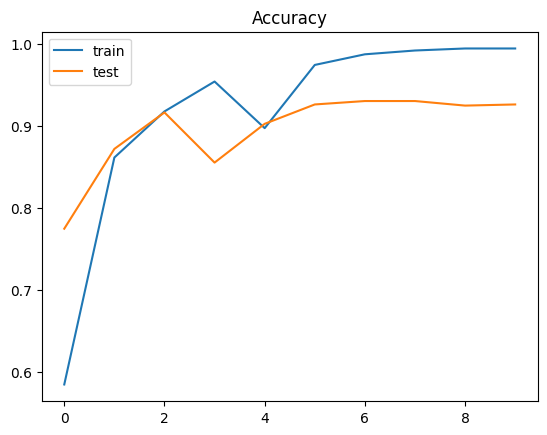

In [ ]:
# Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), 
                              y_pred.argmax(axis=1)))

57/57 [==============================] - 6s 103ms/step


,0,1,2,3,4,5
0,255,3,4,4,4,10
1,0,297,1,9,1,2
2,0,1,299,7,4,3
3,9,8,1,259,1,4
4,0,1,5,1,297,5
5,9,1,4,6,4,281


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(y_true=y_test.argmax(axis=1), 
                            y_pred=y_pred.argmax(axis=1), digits=4))

              precision    recall  f1-score   support

           0     0.9341    0.9107    0.9222       280
           1     0.9550    0.9581    0.9565       310
           2     0.9522    0.9522    0.9522       314
           3     0.9056    0.9184    0.9120       282
           4     0.9550    0.9612    0.9581       309
           5     0.9213    0.9213    0.9213       305

    accuracy                         0.9378      1800
   macro avg     0.9372    0.9370    0.9371      1800
weighted avg     0.9378    0.9378    0.9378      1800



In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/AI_Tagging/model/model_lstm_eng_dowmsampling.h5")

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00036713115769632316)
model_tune.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the hyperparameters
history = model_tune.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=3,
                                             min_delta=0.0001)])

Epoch 1/50
55/55 [==============================] - 86s 2s/step - loss: 0.5484 - accuracy: 0.8817 - val_loss: 0.5448 - val_accuracy: 0.8612
Epoch 2/50
55/55 [==============================] - 77s 1s/step - loss: 0.3637 - accuracy: 0.9023 - val_loss: 0.3729 - val_accuracy: 0.8946
Epoch 3/50
55/55 [==============================] - 81s 1s/step - loss: 0.2748 - accuracy: 0.9263 - val_loss: 0.3090 - val_accuracy: 0.9152
Epoch 4/50
55/55 [==============================] - 77s 1s/step - loss: 0.2212 - accuracy: 0.9346 - val_loss: 0.3187 - val_accuracy: 0.8997
Epoch 5/50
55/55 [==============================] - 81s 1s/step - loss: 0.1752 - accuracy: 0.9537 - val_loss: 0.2830 - val_accuracy: 0.9126
Epoch 6/50
55/55 [==============================] - ETA: 0s - loss: 0.1886 - accuracy: 0.9426

In [ ]:
from keras.models import load_model
model_tune.save('/content/drive/MyDrive/AI_Tagging/model/model_lstm__eng_tune2.h5')

In [ ]:
accr = model_tune.evaluate(X_test,y_test)
print('Test set\n\tLoss: {:0.3f}\n\tAccuracy: {:0.3f}'\
      .format(accr[0],accr[1]))

In [ ]:
import matplotlib.pyplot as plt
# Loss function
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
# Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_tune.predict(X_test)

pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), 
                              y_pred.argmax(axis=1)))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(y_true=y_test.argmax(axis=1), 
                            y_pred=y_pred.argmax(axis=1)))